In [2]:
import sqlite3
import csv
import os
import random
import timeit

In [3]:
# 各種設定
# Configurations
DBFILE = 'TEST_X.db'
CSVFILE = 'refsnp_chrX.csv'
N = 100

In [4]:
# CSVファイルからデータベースファイルを作成
# Create database file from CSV
if os.path.exists(DBFILE):
    os.unlink(DBFILE)

db = sqlite3.connect(DBFILE)
c = db.cursor()

c.execute("""
          CREATE TABLE mutations(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_1(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_2(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_3(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_4(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_5(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

c.execute("""
          CREATE TABLE mutations_6(
            id INTEGER PRIMARY KEY, 
            pos INTEGER NOT NULL,
            base_from TEXT NOT NULL,
            base_to TEXT NOT NULL);
          """)

count= 0
c.execute("BEGIN;")
with open(CSVFILE) as f:
    reader = csv.reader(f)
    next(reader) # skip first line
    next(reader) # skip second line
    for row in reader:
        c.execute("INSERT INTO mutations(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 10 * 1000:
            c.execute("INSERT INTO mutations_1(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 100 * 1000:
            c.execute("INSERT INTO mutations_2(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 1000 * 1000:
            c.execute("INSERT INTO mutations_3(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 2 *1000 * 1000:
            c.execute("INSERT INTO mutations_4(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 5 * 1000 * 1000:
            c.execute("INSERT INTO mutations_5(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        if count < 10 * 1000 * 1000:
            c.execute("INSERT INTO mutations_6(id, pos, base_from, base_to) VALUES(?, ?, ?, ?);", (int(row[0]), int(row[1]), row[2], row[3]))
        count+= 1
    
    
c.execute("COMMIT;")
db.close()

In [5]:
# Get the number of rows in the table
db = sqlite3.connect(DBFILE)
c = db.cursor()

count= c.execute("SELECT COUNT (*) FROM mutations;").fetchall()[0][0]
minv, maxv = c.execute("SELECT MIN(pos), MAX(pos) FROM mutations;").fetchall()[0]

db.close()

print("Number of rows: ", count)
print("Min and max value: ", minv, maxv)

Number of rows:  23707851
Min and max value:  2781480 155701379


In [6]:
# Measure the time performance of conditional query using SELECT statement
# NO index
db = sqlite3.connect(DBFILE)
c = db.cursor()

times_select_no_index= []

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_1 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_2 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_3 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_4 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_5 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_6 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_no_index.append((end - start) / N * 1000) # in milisecond

db.close()

print(times_select_no_index)
# print("Avg time elapsed for each SELECT: {} milliseconds".format((end - start) / N * 1000))

[1.222027999999682, 11.93320099999994, 105.50252600000022, 141.1230169999999, 229.61065299999973, 301.07711800000004, 390.7779610000006]


In [7]:
# Add index
db = sqlite3.connect(DBFILE)
c = db.cursor()

c.execute("CREATE INDEX pos_index_1 ON mutations_1(pos)")
c.execute("CREATE INDEX pos_index_2 ON mutations_2(pos)")
c.execute("CREATE INDEX pos_index_3 ON mutations_3(pos)")
c.execute("CREATE INDEX pos_index_4 ON mutations_4(pos)")
c.execute("CREATE INDEX pos_index_5 ON mutations_5(pos)")
c.execute("CREATE INDEX pos_index_6 ON mutations_6(pos)")
c.execute("CREATE INDEX pos_index ON mutations(pos)")
db.close()

In [8]:
# Measure the time performance of conditional query using SELECT statement
# WITH index
db = sqlite3.connect(DBFILE)
c = db.cursor()

times_select_with_index= []

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_1 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_2 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_3 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_4 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_5 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations_6 WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

start = timeit.default_timer()
for _ in range(N):
    pos = random.randint(minv, maxv)
    c.execute("SELECT * FROM mutations WHERE pos BETWEEN ? AND ?;", (pos, pos+100))
end = timeit.default_timer()
times_select_with_index.append((end - start) / N * 1000) # in milisecond

db.close()

print(times_select_with_index)
# print("Avg time elapsed for each SELECT: {} milliseconds".format((end - start) / N * 1000))

[0.05226900000025125, 0.052643999999872904, 0.07071800000062467, 0.06420999999932064, 0.06910199999992983, 0.06996299999968869, 0.07268300000077943]


In [9]:
# Read using Pandas Dataframe
import pandas as pd

sizes= [10 * 1000, 100 * 1000, 1000 * 1000, 2 * 1000 * 1000, 5 * 1000 * 1000, 10 * 1000 * 1000, count]
data= []

for s in sizes:
    start = timeit.default_timer()
    data.append(pd.read_csv("refsnp_chrX.csv", skiprows=1, nrows=s))
    end = timeit.default_timer()
    print("Time to read ", s, " entries: ", (end - start) * 1000 )

Time to read  10000  entries:  127.2487999999612
Time to read  100000  entries:  82.42519999998876
Time to read  1000000  entries:  389.10390000000916
Time to read  2000000  entries:  731.0543999999481
Time to read  5000000  entries:  1818.4823000000279
Time to read  10000000  entries:  4217.740599999956
Time to read  23707851  entries:  14156.260200000019


In [10]:
# Run search on dataframe and calculate the time elapsed

times_pandas= []

for df in data:
#     print(df)
    start = timeit.default_timer()
    for _ in range(N):
        pos = random.randint(minv, maxv)
        df.loc[(df['pos'] >= pos) & (df['pos'] <= pos + 100)]
    end = timeit.default_timer()
    times_pandas.append((end - start) / N * 1000) # in milisecond
print(times_pandas)
        

[5.037742000000662, 1.217585000000554, 5.512654999999995, 9.914656999999352, 23.40762199999972, 47.35680500000058, 112.09298800000056]


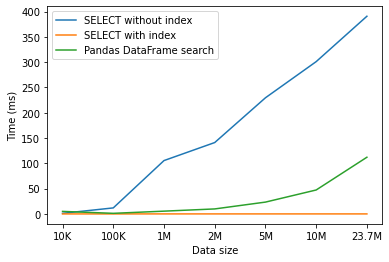

In [13]:
# Plotting graphs
import matplotlib.pyplot as plt

plt.plot(times_select_no_index, label= "SELECT without index")
plt.plot(times_select_with_index, label= "SELECT with index")
plt.plot(times_pandas, label= "Pandas DataFrame search")
plt.ylabel('Time (ms)')
plt.xlabel('Data size')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['10K', '100K', '1M', '2M', '5M', '10M', '23.7M'])
plt.legend(loc='upper left')
plt.show()